# MAS-12 lecture code
---

## Chapter 12   Classification

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

#print(iris)
#print(iris.DESCR,'\n')
#print(iris.data,'\n')
#print(iris.feature_names,'\n')
#print(iris.target,'\n')
#print(iris.target_names,'\n')

#iris dataset.
iris = load_iris()
ir = pd.DataFrame(data=iris.data, columns=iris.feature_names)
ir_species = pd.Series(iris.target)
ir_species = ir_species.map({0:"s", 1:"c", 2:"v"})

## Crabs dataset.
crabs = pd.read_csv("./input/crabs.csv")
lcrabs = np.log(crabs.iloc[:,3:])
lcrabs_grp = list(np.repeat(["B","b","O","o"], [50]*4, axis = 0))
lcrabs_target = np.repeat([0,1,2,3], [50]*4, axis = 0)
lcrabs_target_name = np.array(["B","b","O","o"])

## fgl dataset.
fgl=pd.read_csv("./input/fgl.csv")
fgl_target=fgl.type
fgl_targetnames=['WinNF', 'WinF' ,'Head' ,'Veh' ,'Con', 'Tabl']
#print(fgl_target.value_counts())

##Cushings dataset.
Cushings=pd.read_csv("./input/Cushings.csv")
Cushings_target=Cushings.Type



## 12.1  Discriminant Analysis

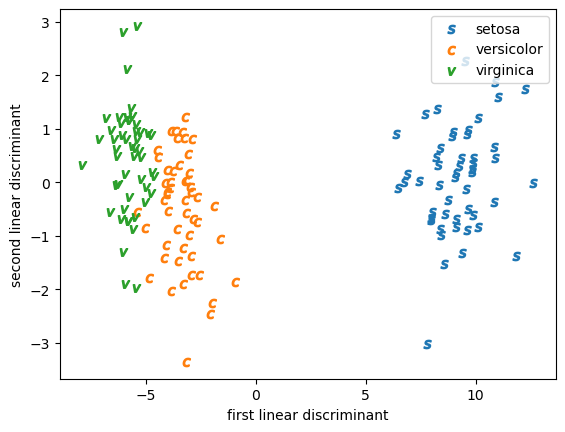

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler


std_ir = StandardScaler().fit_transform(np.log(ir))
ir_lda=LDA()
ir_ld=ir_lda.fit_transform(std_ir,ir_species)
ir_ld[:,0]=-ir_ld[:,0]

lda_columns=['LD1','LD2']
ir_ld = pd.DataFrame(ir_ld, columns=lda_columns)


markers=['$s$', '$c$', '$v$']

for i, marker in enumerate(markers):
    x_axis_data = ir_ld.loc[iris.target==i,:]['LD1']
    y_axis_data = ir_ld.loc[iris.target==i,:]['LD2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('first linear discriminant')
plt.ylabel('second linear discriminant')
plt.show()

In [72]:
std_cr = StandardScaler().fit_transform(lcrabs.drop(["BD"],axis=1))
dcrabs_lda = LDA().fit(std_cr,crabs.sex)
a=pd.DataFrame({'sex':crabs.sex,'predict_sex':dcrabs_lda.predict(std_cr)})
print(pd.crosstab(index=a.sex,columns=a.predict_sex))

dcrabs_lda4 = LDA(n_components=3).fit(std_cr,lcrabs_grp)
dcrabs_pr4=pd.DataFrame(dcrabs_lda4.predict_proba(std_cr),columns=["B","O","b","o"])
dcrabs_pr2=dcrabs_pr4[["B","O"]] @ [1,1]

print(pd.crosstab(index=a.sex,columns=[dcrabs_pr2>0.5]))

predict_sex   F   M
sex                
F            97   3
M             3  97
col_0  False  True 
sex                
F         96      4
M          4     96


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x1
- x2
Feature names seen at fit time, yet now missing:
- LD1
- LD2

  warnings.warn(message, FutureWarning)


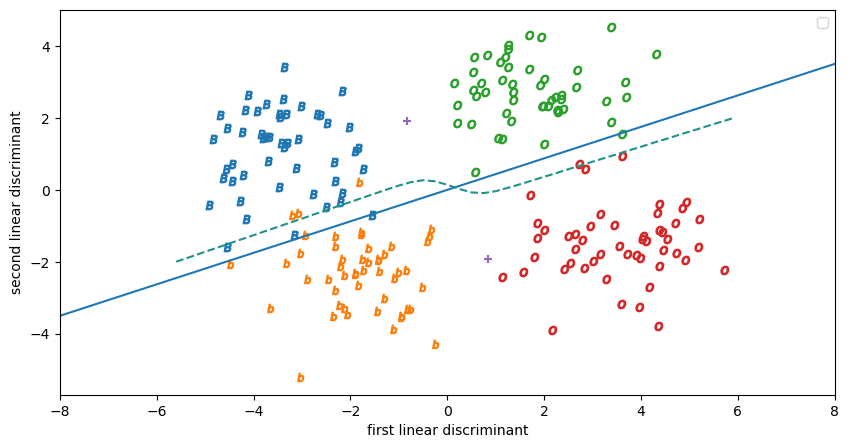

In [73]:
cr_t = dcrabs_lda4.transform(std_cr)[:,[0,1]]


lda_columns=['LD1','LD2']
cr_t = pd.DataFrame(cr_t, columns=lda_columns)


markers=['$B$','$b$', '$O$', '$o$']

fig=plt.figure(figsize=(10,5))
p1=fig.add_subplot(111)

for i, marker in enumerate(markers):
    x_axis_data = cr_t.loc[lcrabs_target==i,:]['LD1']
    y_axis_data = cr_t.loc[lcrabs_target==i,:]['LD2']
    
    p1.scatter(x_axis_data, y_axis_data, marker=marker)

p1.legend(loc='upper right')
p1.set_xlim(-8,8)
p1.set_xlabel('first linear discriminant')
p1.set_ylabel('second linear discriminant')

def perp(x,y):
    u=np.array([-8,8])
    m = (x+y)/2
    s = - (x[0] - y[0])/(x[1] - y[1])            
    p1.plot(u,s*u+m)
    
cr_m = LDA().fit(cr_t,crabs.sex).means_
#print(dcrabs_lda)
p1.scatter(cr_m[:,0],cr_m[:,1],marker="+")
perp(cr_m[0,:],cr_m[1,:])

cr_lda=LDA().fit(cr_t,lcrabs_grp)
x=np.arange(-6, 6.25, 0.25)
y=np.arange(-2, 2.25, 0.25)

x1= np.tile(x,len(y))
x2=np.repeat(y,len(x))

#print(x2)

Xcon = pd.DataFrame({'x1':x1,'x2':x2})
#print(Xcon)


cr_pr=pd.DataFrame(cr_lda.predict_proba(Xcon),columns=["B","O",'b',"o"])[["B","O"]]@ [1,1]
cr_pr=cr_pr.values.reshape((len(y),len(x)))
#print(cr_pr)

p1.contour(x,y,cr_pr,levels=1,linestyles='dashed' )

In [74]:
for i in range(0,4):
    c=lcrabs.loc[lcrabs_target==i,:]
    name=["B","b","O","o"][i]
    print(f"Covariance matrix of the column {name}","\n",pd.DataFrame.cov(c),"\n\n")

Covariance matrix of the column B 
           FL        RW        CL        CW        BD
FL  0.052964  0.043251  0.056633  0.056006  0.058748
RW  0.043251  0.037247  0.046800  0.046336  0.048304
CL  0.056633  0.046800  0.061045  0.060328  0.063118
CW  0.056006  0.046336  0.060328  0.059738  0.062495
BD  0.058748  0.048304  0.063118  0.062495  0.066021 


Covariance matrix of the column b 
           FL        RW        CL        CW        BD
FL  0.043578  0.043610  0.046080  0.045675  0.050083
RW  0.043610  0.045040  0.046544  0.046172  0.050729
CL  0.046080  0.046544  0.049147  0.048631  0.053537
CW  0.045675  0.046172  0.048631  0.048261  0.053015
BD  0.050083  0.050729  0.053537  0.053015  0.059463 


Covariance matrix of the column O 
           FL        RW        CL        CW        BD
FL  0.048712  0.040674  0.052366  0.052165  0.053486
RW  0.040674  0.035038  0.044230  0.044110  0.045120
CL  0.052366  0.044230  0.056893  0.056651  0.057999
CW  0.052165  0.044110  0.056651  0.05

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


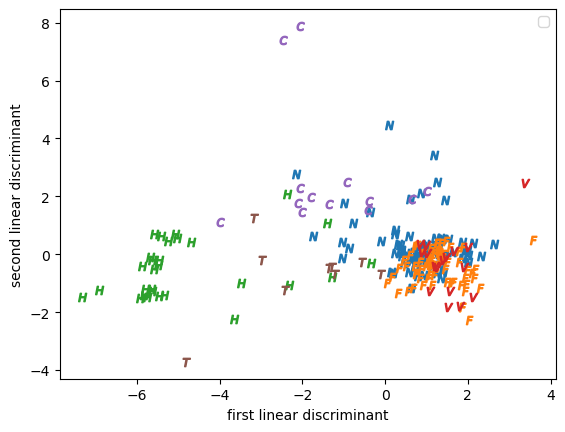

In [75]:
std_fgl = StandardScaler().fit_transform(fgl.drop(["type"],axis=1))

fgl_ld=LDA().fit(std_fgl,fgl_target).transform(std_fgl)[:,[0,1]]
fgl_ld[:,0]=-fgl_ld[:,0]
fgl_ld=pd.DataFrame(data=fgl_ld,columns=lda_columns)
#print(fgl_ld[:10])

markers=[ "$N$","$F$",  "$H$","$V$", "$C$", "$T$"]

for i, marker in enumerate(markers):
    name=fgl_targetnames[i]
    x_axis_data = fgl_ld.loc[fgl_target==name,:]['LD1']
    y_axis_data = fgl_ld.loc[fgl_target==name,:]['LD2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend(loc='upper right')
plt.xlabel('first linear discriminant')
plt.ylabel('second linear discriminant')
plt.show()

## 12.2  Classification theory

In [76]:
##

def predplot(object,fig,t):
    
    len=100
    p1=fig.add_subplot(220+t)
    
    markers=[(f"${al}$")  for al in Cushings.Type.unique()]

    for i, marker in enumerate(markers):
        s = Cushings.Type==Cushings.Type.unique()[i]
        name=fgl_targetnames[i]
        x_axis_data = Cushings.loc[s, :].iloc[:,0]
        y_axis_data = Cushings.loc[s, :].iloc[:,1]

        plt.scatter(x_axis_data, y_axis_data, marker=marker)
        plt.title("LDA" if t ==1 else "QDA")


    xp = np.linspace(0.6, 4.0, len)
    yp = np.linspace(-3.25, 2.45, len)
    cushT =pd.DataFrame([(x, y)  for y in yp for x in xp], 
                    columns=['Tetrahydrocortisone','Pregnanetriol'])
    
    Z1 = object.predict(cushT)
    Z2 = object.predict_proba(cushT)
#    print(Z2[:,2])
    zp = Z2[:,2] - np.maximum(Z2[:,1], Z2[:,0])
    zp=zp.reshape((len,-1))
    p1.contour(np.exp(xp), 
               np.exp(yp), zp,
               levels = 0)
    
    zp=Z2[:,0] - np.maximum(Z2[:,1], Z2[:,2])
    zp=zp.reshape((len,-1))
    p1.contour(np.exp(xp), 
               np.exp(yp), zp,
               levels = 0)
    p1.set_xlabel("Tetrahydrocortisone")
    p1.set_ylabel("Pregnanetriol")
    p1.semilogy(base=10)
    p1.semilogx(base=10)

In [142]:
def cushplot(xp, yp, Z, p1):
    
    
    markers=[(f"${al}$")  for al in Cushings.Type.unique()]

    for i, marker in enumerate(markers):
        s = Cushings.Type==Cushings.Type.unique()[i]
        name=fgl_targetnames[i]
        x_axis_data = Cushings.loc[s, :].iloc[:,0]
        y_axis_data = Cushings.loc[s, :].iloc[:,1]

        plt.scatter(x_axis_data, y_axis_data, marker=marker)

    zp = Z[:,2] - np.maximum(Z[:,1], Z[:,0])
    zp=zp.reshape((n_p,-1))
    p1.contour(np.exp(xp), np.exp(yp), zp, levels = 0)
#    print(Z[:,2])
    
    zp = Z[:,0] - np.maximum(Z[:,1], Z[:,2])
    zp=zp.reshape((n_p,-1))
    p1.contour(np.exp(xp), np.exp(yp), zp, levels = 0)
    
    p1.set_xlabel("Tetrahydrocortisone")
    p1.set_ylabel("Pregnanetriol")
    p1.semilogy(base=10)
    p1.semilogx(base=10)



In [123]:
##

cush=np.log(Cushings.drop(Cushings.columns[[2]],axis=1))
tp = Cushings.Type[0:21]
#print(tp)

In [124]:
##
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

cush_lda = LDA().fit(cush[0:21],tp)
cush_qda = QDA().fit(cush[0:21],tp)


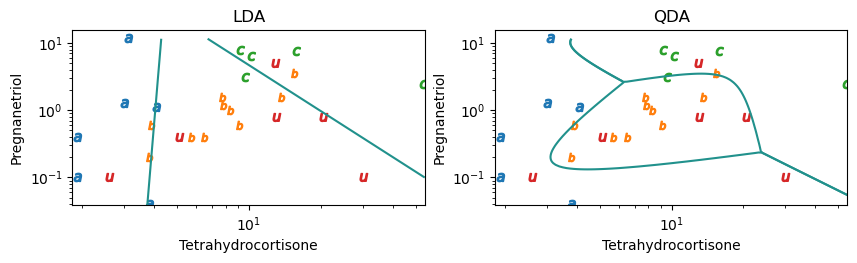

In [125]:
fig=plt.figure(figsize=(10,5))

predplot(cush_lda,fig, 1)
predplot(cush_qda,fig, 2)


#predplot(cush_qda,3, "QDA (predictive)", method = "predictive")
#predplot(cush_qda,4, "QDA (debiased)", method = "debiased")

In [126]:
#
from sklearn.linear_model import LogisticRegression

Cf = pd.DataFrame({'tp' : tp,
                'Tetrahydrocortisone' : np.log(Cushings[0:21].iloc[:,0]),
                'Pregnanetriol' : np.log(Cushings[0:21].iloc[:,1])} )
#print(Cf.iloc[:,1:3][0:10])

cush_multinom=LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(Cf.iloc[:,1:3],Cf['tp'])

In [127]:
xp = np.linspace(0.6, 4.0, 100)
n_p = len(xp)
yp = np.linspace(-3.25, 2.45, 100)

cushT =pd.DataFrame([(x, y)  for y in yp for x in xp], 
                    columns=['Tetrahydrocortisone','Pregnanetriol'])

Text(0.5, 1.0, 'Logistic Regression')

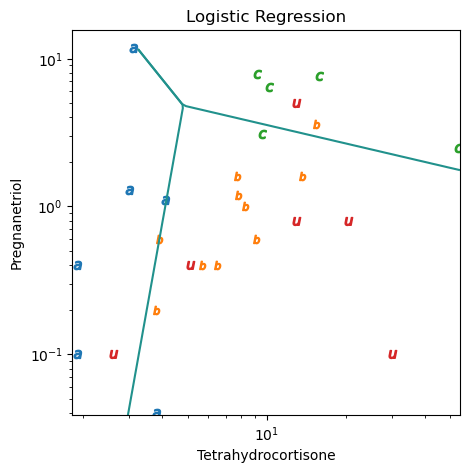

In [143]:
Z = cush_multinom.predict_proba(cushT)
#print(type(Z))

fig=plt.figure(figsize=(5,5))
p1=fig.add_subplot(111)

cushplot(xp, yp, Z,p1)

p1.set_title("Logistic Regression")

In [129]:
from sklearn import tree

cush_tr=tree.DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=0).fit(Cf.iloc[:,1:3],Cf['tp'])


Text(0.5, 1.0, 'Classification tree')

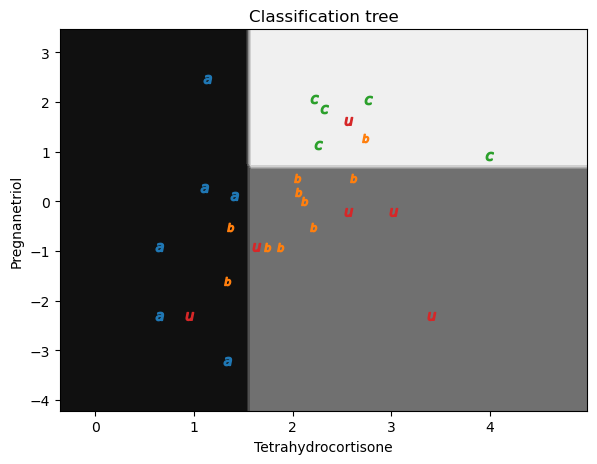

In [85]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


ax = plt.subplot(1,1,1)

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
        cush_tr,
        Cf.iloc[:,1:3],
        cmap=plt.cm.gray,
        response_method="predict", ax=ax)

markers=[(f"${al}$")  for al in Cushings.Type.unique()]


for i, marker in enumerate(markers):
    s = Cushings.Type==Cushings.Type.unique()[i]
    name=fgl_targetnames[i]
    x_axis_data = cush.loc[s, :].iloc[:,0]
    y_axis_data = cush.loc[s, :].iloc[:,1]

    plt.scatter(x_axis_data, y_axis_data, marker=marker)
        

        
plt.xlabel("Tetrahydrocortisone")
plt.ylabel("Pregnanetriol")
plt.title("Classification tree")

## 12.3  Non-parametric rules

Text(0.5, 1.0, '3-NN')

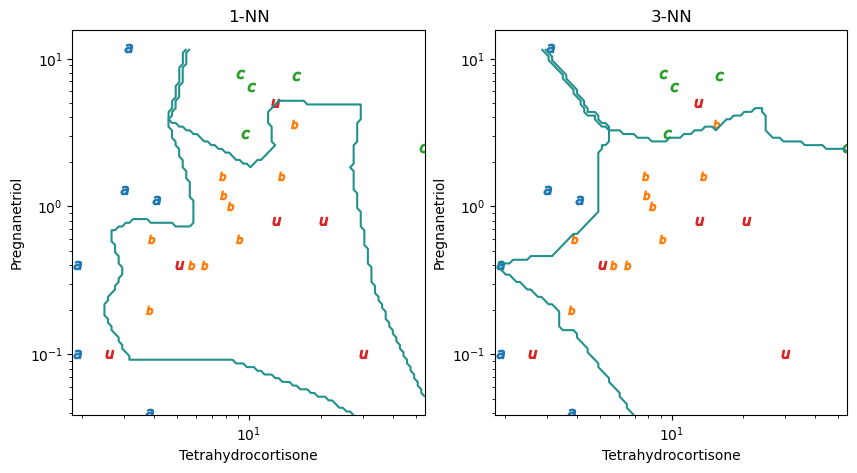

In [144]:
#

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

def not_center_scale(x):
    t =x.iloc[:,0]/3.4
    p = x.iloc[:,1]/5.7
    std_cu=pd.concat([t,p],axis=1)
    return std_cu
#print(cush)

cu1=not_center_scale(cush[0:21])
cu2=not_center_scale(cushT)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(cu1,tp)
Z=knn.predict(cu2)

#print(np.unique(Z,return_counts=True))
class_ind_Z=np.array(pd.get_dummies(Z))
#print(pd.get_dummies(Z))

fig=plt.figure(figsize=(10,5))
p1=fig.add_subplot(121)
cushplot(xp, yp, class_ind_Z,p1)
p1.set_title( "1-NN")

knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(cu1,tp)
Z=knn.predict(cu2)

#print(np.unique(Z,return_counts=True))
class_ind_Z=np.array(pd.get_dummies(Z))

p2=fig.add_subplot(122)
cushplot(xp, yp, class_ind_Z,p2)
p2.set_title( "3-NN")

## 12.4  Neural networks

In [145]:
def pltnn(main,t, *args):
    
    #fig=plt.figure(figsize=(15,10))
    #p1=fig.add_subplot(220+t)
    
    markers=[(f"${al}$")  for al in Cushings.Type.unique()]

    #그래프 그리기.
    for i, marker in enumerate(markers):
        s = Cushings.Type==Cushings.Type.unique()[i]
        name=fgl_targetnames[i]
        x_axis_data = Cushings.loc[s, :].iloc[:,0]
        y_axis_data = Cushings.loc[s, :].iloc[:,1]

        plt.scatter(x_axis_data, y_axis_data, marker=marker)
        
    p1.set_xlabel("Tetrahydrocortisone")
    p1.set_ylabel("Pregnanetriol")
    p1.semilogy(base=10)
    p1.semilogx(base=10)
    p1.set_title(main)


In [146]:
def softmax(a):
    
    y=np.exp(a)/np.sum(np.exp(a))
    return y

--------------

In [192]:
from sklearn.neural_network import MLPClassifier

def plt_bndry(size,decay,col):
    
    cush_nn = MLPClassifier(hidden_layer_sizes=(size), 
                             activation='logistic', 
                             solver='sgd', 
                             max_iter=1000,learning_rate_init=0.5,alpha=decay)
    cush_nn.fit(cush, tp)
    cush_pred=pd.DataFrame(cush_nn.predict_proba(cushT)).apply(softmax,axis=1)
    b1(cush_pred,col)
    


In [193]:

def b1(Z,col):

    zp = Z[2] - np.maximum(Z[1], Z[0])
    zp=zp.values.reshape((n_p,-1))
    p1.contour(np.exp(xp), np.exp(yp), zp,levels=0,colors=col)
    
    zp = Z[0] - np.maximum(Z[1], Z[2])
    zp=zp.values.reshape((n_p,-1))
    p1.contour(np.exp(xp), np.exp(yp), zp,levels=0,colors=col)

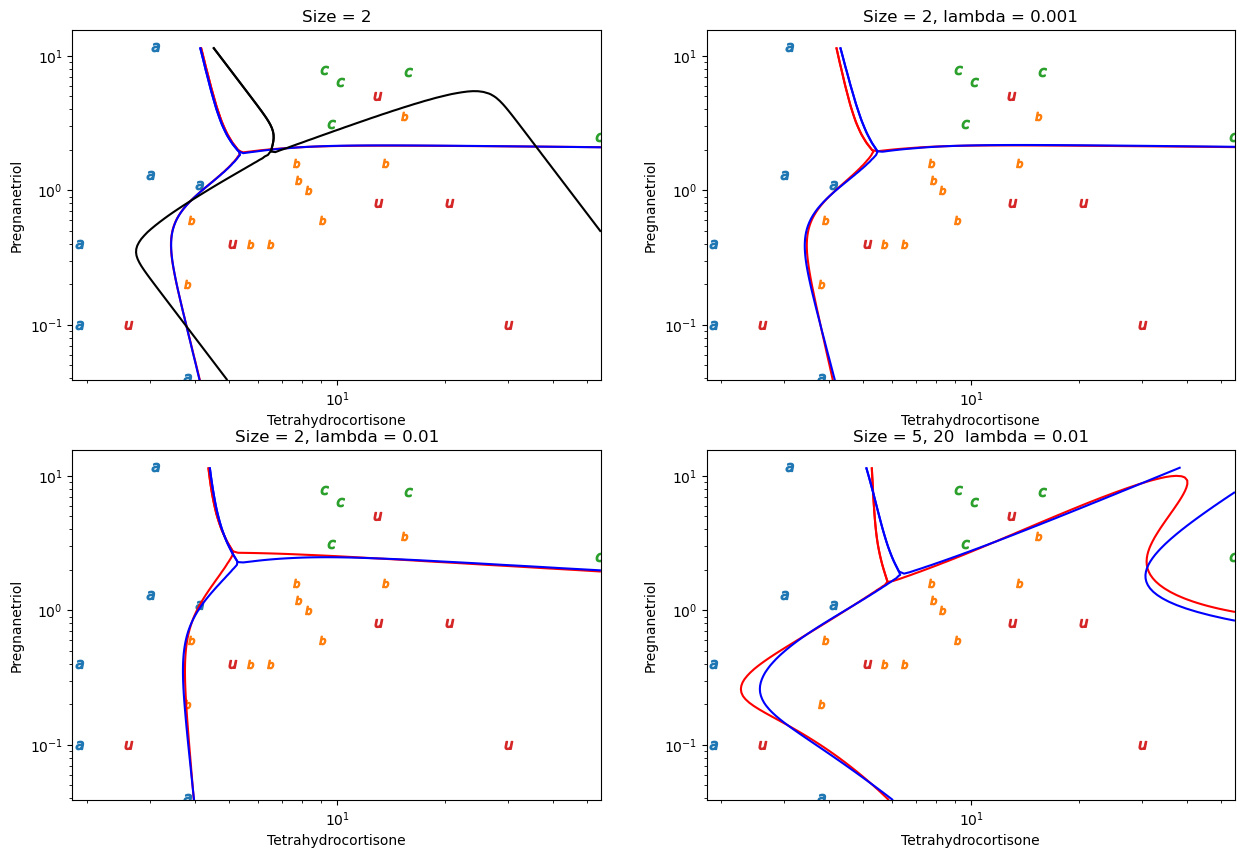

In [199]:
cush = cush[0:21]
#print(cush)

tpi = pd.get_dummies(tp)
#print(tpi)


# functions pltnn and plt_bndry given in the scripts
fig=plt.figure(figsize=(15,10))
p1=fig.add_subplot(221)

pltnn("Size = 2",1)
np.random.seed(1); plt_bndry(size=2,decay=0,col='red')
np.random.seed(3); plt_bndry(size=2,decay=0,col='b')
plt_bndry(size=2,decay=0,col='k')

p1=fig.add_subplot(222)
pltnn("Size = 2, lambda = 0.001",2)
np.random.seed(1); plt_bndry(size=2,decay=0.001, col='red')
np.random.seed(2); plt_bndry(size=2,decay=0.001, col='b')

p1=fig.add_subplot(223)
pltnn("Size = 2, lambda = 0.01",3)
np.random.seed(1); plt_bndry(size=2,decay=0.01, col='red')
np.random.seed(4); plt_bndry(size=2,decay=0.01, col='b')

p1=fig.add_subplot(224)
pltnn("Size = 5, 20  lambda = 0.01",4)
np.random.seed(2); plt_bndry(size=5,decay=0.01,col='red')
np.random.seed(2); plt_bndry(size=20,decay=0.01,col='b')


/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

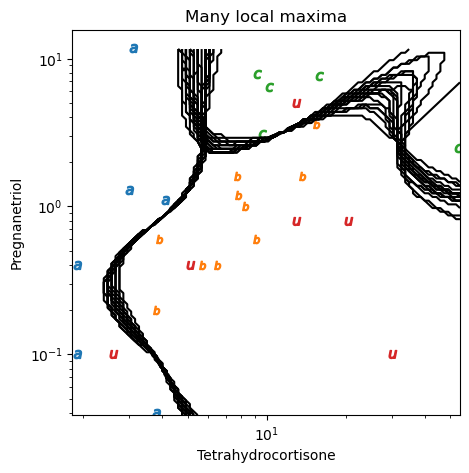

In [180]:
fig=plt.figure(figsize=(5,5))
p1=fig.add_subplot(111)
# functions pltnn and b1 are in the scripts
pltnn("Many local maxima",t=1)


Z = np.zeros( (cushT.shape[0], tpi.shape[1]))


for iter in range(0,20) :
    np.random.seed(iter)
    cush_nn= MLPClassifier(hidden_layer_sizes=(27), 
                             activation='logistic', 
                             solver='sgd', 
                             max_iter=1000,alpha=0.01,
                          learning_rate_init=0.15)
    Z = Z + cush_nn.fit(cush,tpi).predict_proba( cushT)
#    print("final value", f"{cush_nn.coefs_}", "\n")
    b1(pd.DataFrame(cush_nn.predict(cushT)), col = 'k')

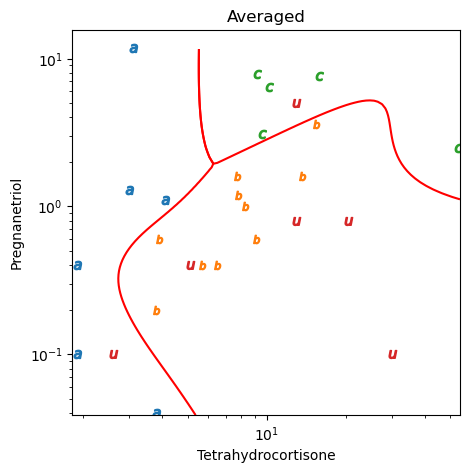

In [179]:
fig=plt.figure(figsize=(5,5))
p1=fig.add_subplot(111)
pltnn("Averaged",1)
b1(pd.DataFrame(Z), col='red')

## 12.5  Support vector machines

In [152]:
from sklearn import svm
crabs_svm = svm.SVC(kernel='linear', C=100)
crabs_svm.fit(lcrabs,crabs.sp)

print(pd.crosstab(index=crabs.sp,
                  columns=crabs_svm.predict(lcrabs)))


col_0    B    O
sp             
B      100    0
O        0  100


## 12.6  Forensic glass example

In [153]:
np.random.seed(123)
# dump random partition from S-PLUS
rand = [9, 6, 7, 10, 8, 8, 2, 2, 10, 1, 5, 2, 3, 8, 6, 8, 2, 6, 4,
4, 6, 1, 3, 2, 5, 5, 5, 3, 1, 9, 10, 2, 8, 2, 1, 6, 2, 7, 7, 8, 4, 1,
9, 5, 5, 1, 4, 6, 8, 6, 5, 7, 9, 2, 1, 1, 10, 9, 7, 6, 4, 7, 4, 8, 9,
9, 1, 8, 9, 5, 3, 3, 4, 8, 8, 6, 6, 9, 3, 10, 3, 10, 6, 6, 5, 10, 10,
2, 10, 6, 1, 4, 7, 8, 9, 10, 7, 10, 8, 4, 6, 8, 9, 10, 1, 9, 10, 6, 8,
4, 10, 8, 2, 10, 2, 3, 10, 1, 5, 9, 4, 4, 8, 2, 7, 6, 4, 8, 10, 4, 8,
10, 6, 10, 4, 9, 4, 1, 6, 5, 3, 2, 4, 1, 3, 4, 8, 4, 3, 7, 2, 5, 4, 5,
10, 7, 4, 2, 6, 3, 2, 2, 8, 4, 10, 8, 10, 2, 10, 6, 5, 2, 3, 2, 6, 2,
7, 7, 8, 9, 7, 10, 8, 6, 7, 9, 7, 10, 3, 2, 7, 5, 6, 1, 3, 9, 7, 7, 1,
8, 7, 8, 8, 8, 10, 4, 5, 9, 4, 6, 9, 6, 10, 2]
rand=np.array(rand)

In [154]:
def con(*args):
    tab = pd.crosstab(*args)
    print(tab)
    tab = np.matrix(tab)
    
    r, c = tab.shape
    print(r,c)
    for i in range(0,r): tab[i,i]=0
    print(tab)
    print("error rate = ",
        round(100*(np.sum(tab))/len([*args[0]]), 2), "\n\n")
    return tab

In [155]:
#
##
def CVtest(fitfn, predfn, *args):
    res = np.array(["aaaaaaaa"]*214)
    
    for i in sorted(np.unique(rand)) :
        print("fold  ", i, "\n")
#        print(rand!=i)
        learn = fitfn(rand != i, *args)
        res[rand == i] = predfn(learn, rand == i)
        print(sum(fgl.type!=res))
    return res

def func1(x,*args):

    return LogisticRegression(multi_class='multinomial',
                              max_iter=1000).fit(fgl.iloc[x,0:9], fgl.type.iloc[x])

def func2(obj,x):
    return obj.predict(fgl[x].iloc[:,0:9])

from sklearn import linear_model

res_multinom= CVtest(func1,func2)

#print(res_multinom)

fold   1 

204
fold   2 

191
fold   3 

184
fold   4 



/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

172
fold   5 

162
fold   6 

144
fold   7 

136
fold   8 

115
fold   9 

103
fold   10 

86


/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [156]:
tab=con(fgl.type, res_multinom)

#print(tab)

col_0  Con  Head  Tabl  Veh  WinF  WinNF
type                                    
Con      5     1     0    0     0      7
Head     1    24     0    0     1      3
Tabl     0     3     3    0     0      3
Veh      0     0     0    0    11      6
WinF     0     0     0    1    47     22
WinNF    2     0     3    0    22     49
6 6
[[ 0  1  0  0  0  7]
 [ 1  0  0  0  1  3]
 [ 0  3  0  0  0  3]
 [ 0  0  0  0 11  6]
 [ 0  0  0  1  0 22]
 [ 2  0  3  0 22  0]]
error rate =  40.19 




In [157]:
def func9(x,*args):
    print()
    return LDA().fit(fgl[x].iloc[:,0:9], fgl.type[x])

def func2(obj,x):
    return obj.predict(fgl[x].iloc[:,0:9])

res_lda=CVtest(func9,func2)
#print(res_lda)

fold   1 


204
fold   2 


189
fold   3 


182
fold   4 


167
fold   5 


156
fold   6 


140
fold   7 


128
fold   8 


109
fold   9 


96
fold   10 


80


In [158]:
#

con(fgl.type, res_lda)

col_0  Con  Head  Tabl  Veh  WinF  WinNF
type                                    
Con      6     1     0    0     0      6
Head     2    25     0    0     2      0
Tabl     0     2     4    0     1      2
Veh      0     0     0    0    10      7
WinF     0     0     0    3    49     18
WinNF    2     1     2    0    21     50
6 6
[[ 0  1  0  0  0  6]
 [ 2  0  0  0  2  0]
 [ 0  2  0  0  1  2]
 [ 0  0  0  0 10  7]
 [ 0  0  0  3  0 18]
 [ 2  1  2  0 21  0]]
error rate =  37.38 




matrix([[ 0,  1,  0,  0,  0,  6],
        [ 2,  0,  0,  0,  2,  0],
        [ 0,  2,  0,  0,  1,  2],
        [ 0,  0,  0,  0, 10,  7],
        [ 0,  0,  0,  3,  0, 18],
        [ 2,  1,  2,  0, 21,  0]])

In [159]:
#

fgl0 = fgl.drop(fgl.columns[[9]],axis=1) # drop type
print(fgl0)

def res_knn1():
    res = np.array(["aaaaaaaa"]*214)
    knn=KNeighborsClassifier(n_neighbors = 1)
    
    
    
    for i in sorted(np.unique(rand)): 
        print("fold ", i ,"\n")
        knn.fit(fgl0[rand != i],fgl.type[rand != i])
        res[rand == i]=knn.predict( fgl0[rand == i])


    return res 

#print(res_knn1())

       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    3.01  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1   -0.39  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2   -1.82  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3   -0.34  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4   -0.58  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..    ...    ...   ...   ...    ...   ...   ...   ...  ...
209 -1.77  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210 -1.15  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  2.65  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212 -1.49  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213 -0.89  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [160]:
#

con(fgl.type, res_knn1())

fold  1 

fold  2 

fold  3 

fold  4 

fold  5 

fold  6 

fold  7 

fold  8 

fold  9 

fold  10 

col_0  Con  Head  Tabl  Veh  WinF  WinNF
type                                    
Con      8     2     1    0     0      2
Head     1    22     1    1     0      4
Tabl     1     1     6    0     1      0
Veh      0     0     0   11     2      4
WinF     0     0     0    5    59      6
WinNF    3     0     1    3    12     57
6 6
[[ 0  2  1  0  0  2]
 [ 1  0  1  1  0  4]
 [ 1  1  0  0  1  0]
 [ 0  0  0  0  2  4]
 [ 0  0  0  5  0  6]
 [ 3  0  1  3 12  0]]
error rate =  23.83 




matrix([[ 0,  2,  1,  0,  0,  2],
        [ 1,  0,  1,  1,  0,  4],
        [ 1,  1,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  2,  4],
        [ 0,  0,  0,  5,  0,  6],
        [ 3,  0,  1,  3, 12,  0]])

In [161]:
##

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(fgl0,fgl.type)
res_lb=knn.predict_proba(fgl0)
table_res=pd.DataFrame(np.unique(np.max(res_lb,axis=1),return_counts=True))
print(table_res)

           0          1      2
0   0.333333   0.666667    1.0
1  10.000000  64.000000  140.0


-------

In [162]:
'''
library(rpart)
res.rpart <- CVtest(
  function(x, ...) {
    tr <- rpart(type ~ ., fgl[x,], ...)
    cp <- tr$cptable
    r <- cp[, 4] + cp[, 5]
    rmin <- min(seq(along = r)[cp[, 4] < min(r)])
    cp0 <- cp[rmin, 1]
    cat("size chosen was", cp[rmin, 2] + 1, "\n")
    prune(tr, cp = 1.01*cp0)
  },
  function(obj, x)
    predict(obj, fgl[x, ], type = "class"),
  cp = 0.001
)

con(true = fgl$type, predicted = res.rpart)

fgl1 <- fgl
fgl1[1:9] <- lapply(fgl[, 1:9], function(x)
               {r <- range(x); (x - r[1])/diff(r)})
'''

'\nlibrary(rpart)\nres.rpart <- CVtest(\n  function(x, ...) {\n    tr <- rpart(type ~ ., fgl[x,], ...)\n    cp <- tr$cptable\n    r <- cp[, 4] + cp[, 5]\n    rmin <- min(seq(along = r)[cp[, 4] < min(r)])\n    cp0 <- cp[rmin, 1]\n    cat("size chosen was", cp[rmin, 2] + 1, "\n")\n    prune(tr, cp = 1.01*cp0)\n  },\n  function(obj, x)\n    predict(obj, fgl[x, ], type = "class"),\n  cp = 0.001\n)\n\ncon(true = fgl$type, predicted = res.rpart)\n\nfgl1 <- fgl\nfgl1[1:9] <- lapply(fgl[, 1:9], function(x)\n               {r <- range(x); (x - r[1])/diff(r)})\n'

In [163]:
'''
CVnn2 = function(formula, data,
                  size = rep(6,2), lambda = c(0.001, 0.01),
                  nreps = 1, nifold = 5, verbose = 99, ...)
{
    CVnn1 = function(formula, data, nreps=1, ri, verbose,  ...)
    {
        truth = data[,deparse(formula[[2]])]
        res =  matrix(0, nrow(data), length(levels(truth)))
        if(verbose > 20) cat("  inner fold")
        for (i in sort(unique(ri))) {
            if(verbose > 20) cat(" ", i,  sep="")
            for(rep in 0:nreps) {
                learn = nnet(formula, data[ri !=i,], trace = FALSE, ...)
                res[ri == i,] = res[ri == i,] +
                    predict(learn, data[ri == i,])
            }
        }
        if(verbose > 20) cat("\n")
        sum(as.numeric(truth) != max.col(res/nreps))
    }
    truth = data[,deparse(formula[[2]])]
    res =  matrix(0, nrow(data), length(levels(truth)))
    choice = numeric(length(lambda))
    for (i in sort(unique(rand))) {
        if(verbose > 0) cat("fold ", i,"\n", sep="")
        ri = sample(nifold, sum(rand!=i), replace=TRUE)
        for(j in seq(along=lambda)) {
            if(verbose > 10)
                cat("  size =", size[j], "decay =", lambda[j], "\n")
            choice[j] = CVnn1(formula, data[rand != i,], nreps=nreps,
                               ri=ri, size=size[j], decay=lambda[j],
                               verbose=verbose, ...)
        }
        decay = lambda[which.is.max(-choice)]
        csize = size[which.is.max(-choice)]
        if(verbose > 5) cat("  #errors:", choice, "  ") #
        if(verbose > 1) cat("chosen size = ", csize,
                            " decay = ", decay, "\n", sep="")
        for(rep in 0:nreps) {
            learn = nnet(formula, data[rand != i,], trace=FALSE,
                          size=csize, decay=decay, ...)
            res[rand == i,] = res[rand == i,] +
                predict(learn, data[rand == i,])
        }
    }
    factor(levels(truth)[max.col(res/nreps)], levels = levels(truth))
}

if(FALSE) { # only run this if you have time to wait
res.nn2 = CVnn2(type ~ ., fgl1, skip = TRUE, maxit = 500, nreps = 10)
con(true = fgl$type, predicted = res.nn2)
}
'''


'\nCVnn2 = function(formula, data,\n                  size = rep(6,2), lambda = c(0.001, 0.01),\n                  nreps = 1, nifold = 5, verbose = 99, ...)\n{\n    CVnn1 = function(formula, data, nreps=1, ri, verbose,  ...)\n    {\n        truth = data[,deparse(formula[[2]])]\n        res =  matrix(0, nrow(data), length(levels(truth)))\n        if(verbose > 20) cat("  inner fold")\n        for (i in sort(unique(ri))) {\n            if(verbose > 20) cat(" ", i,  sep="")\n            for(rep in 0:nreps) {\n                learn = nnet(formula, data[ri !=i,], trace = FALSE, ...)\n                res[ri == i,] = res[ri == i,] +\n                    predict(learn, data[ri == i,])\n            }\n        }\n        if(verbose > 20) cat("\n")\n        sum(as.numeric(truth) != max.col(res/nreps))\n    }\n    truth = data[,deparse(formula[[2]])]\n    res =  matrix(0, nrow(data), length(levels(truth)))\n    choice = numeric(length(lambda))\n    for (i in sort(unique(rand))) {\n        if(verbos

In [164]:
def func4(x,*args):
    fgl_svm=svm.SVC(kernel='linear', C=100).fit(fgl.iloc[x,0:9],fgl.type.iloc[x])
    return fgl_svm

res_svm=CVtest(func4,func2)

fold   1 

204
fold   2 

187
fold   3 

182
fold   4 

168
fold   5 

157
fold   6 

142
fold   7 

130
fold   8 

112
fold   9 

97
fold   10 

81


In [165]:
##

con( fgl.type, res_svm)

col_0  Con  Head  Tabl  Veh  WinF  WinNF
type                                    
Con      9     1     0    0     0      3
Head     1    25     0    0     1      2
Tabl     1     0     6    0     0      2
Veh      0     0     0    4     7      6
WinF     0     0     0    6    44     20
WinNF    3     4     1    2    21     45
6 6
[[ 0  1  0  0  0  3]
 [ 1  0  0  0  1  2]
 [ 1  0  0  0  0  2]
 [ 0  0  0  0  7  6]
 [ 0  0  0  6  0 20]
 [ 3  4  1  2 21  0]]
error rate =  37.85 




matrix([[ 0,  1,  0,  0,  0,  3],
        [ 1,  0,  0,  0,  1,  2],
        [ 1,  0,  0,  0,  0,  2],
        [ 0,  0,  0,  0,  7,  6],
        [ 0,  0,  0,  6,  0, 20],
        [ 3,  4,  1,  2, 21,  0]])

In [166]:
from sklearn import svm

fgl_svm2 = svm.SVC(kernel='linear', C=100).fit(fgl.iloc[x,0:9],fgl.type.iloc[x])
fgl_svm2


SVC(C=100, kernel='linear')

In [167]:
'''

CV.lvq <- function()
{
    res <- fgl$type
    for(i in sort(unique(rand))) {
        cat("doing fold", i, "\n")
        cd0 <- lvqinit(fgl0[rand != i,], fgl$type[rand != i],
                       prior = rep(1, 6)/6, k = 3)
        cd1 <- olvq1(fgl0[rand != i,], fgl$type[rand != i], cd0)
        cd1 <- lvq3(fgl0[rand != i,], fgl$type[rand != i],
                    cd1, niter = 10000)
        res[rand == i] <- lvqtest(cd1, fgl0[rand == i, ])
    }
    res
}
con(true = fgl$type, predicted = CV.lvq())
'''

'\n\nCV.lvq <- function()\n{\n    res <- fgl$type\n    for(i in sort(unique(rand))) {\n        cat("doing fold", i, "\n")\n        cd0 <- lvqinit(fgl0[rand != i,], fgl$type[rand != i],\n                       prior = rep(1, 6)/6, k = 3)\n        cd1 <- olvq1(fgl0[rand != i,], fgl$type[rand != i], cd0)\n        cd1 <- lvq3(fgl0[rand != i,], fgl$type[rand != i],\n                    cd1, niter = 10000)\n        res[rand == i] <- lvqtest(cd1, fgl0[rand == i, ])\n    }\n    res\n}\ncon(true = fgl$type, predicted = CV.lvq())\n'

## 12.7  Calibration plots

In [168]:
##

def CVprobs(fitfn, predfn, *args):

    res = np.zeros((214,6))
    
    for i in sorted(np.unique(rand)):
        print("fold ", i, "\n")
        learn = fitfn(rand != i, *args)
        res[rand == i,:] = predfn(learn, rand == i)
    
    print(res)
    return res


In [169]:
a=np.array(pd.get_dummies(fgl.type)).flatten()

In [170]:
def func7(obj,x):
    return obj.predict_proba(fgl[x].iloc[:,0:9])

probs_multinom = CVprobs(func1,func7)

fold  1 

fold  2 

fold  3 

fold  4 



/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

fold  5 

fold  6 

fold  7 

fold  8 

fold  9 



/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

fold  10 

[[2.54998771e-04 6.86354469e-04 2.31729438e-03 1.16245343e-01
  7.19451883e-01 1.61044127e-01]
 [5.85696487e-03 3.83861440e-02 3.31981160e-02 1.02650316e-01
  3.78009851e-01 4.41898608e-01]
 [1.53153296e-02 2.77559437e-02 1.57441834e-02 1.15413101e-01
  3.08851237e-01 5.16920206e-01]
 ...
 [5.47038101e-04 9.96480873e-01 2.95998482e-04 1.15766984e-06
  1.46132484e-05 2.66031969e-03]
 [1.72465665e-02 9.73548810e-01 7.72208800e-03 2.55909985e-05
  2.92510485e-05 1.42769394e-03]
 [7.86159629e-03 9.79021335e-01 4.48910596e-03 3.51083612e-05
  5.10388069e-05 8.54181540e-03]]


/Users/kyungseonlee/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
probs_yes = np.array(pd.get_dummies(fgl.type)).flatten()
probs = np.array(probs_multinom).flatten()

In [172]:
#!pip install scikit-misc
from skmisc.loess import loess

[(0.0, 1.0), (0.0, 1.0), Text(0.5, 0, 'predicted probability')]

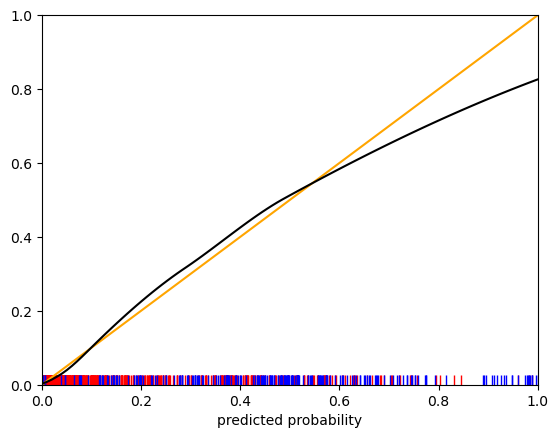

In [173]:
import seaborn as sns

g=sns.rugplot(probs[probs_yes == 0],color='r')
sns.rugplot(probs[probs_yes == 1],color='b')
sns.lineplot([0,1],color='orange')

newp=np.linspace(0,1,100)
y=loess(probs,probs_yes)
y=y.predict(newp).values

sns.lineplot(x=newp,y=y,color='black')

g.set(xlim=(0,1),ylim=(0,1),xlabel='predicted probability')
